In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('../processed_data/gurgaon_properties_outlier_treated.csv')

In [9]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,sobha city,sector 108,3.95,16858.0,2343.101198,Super Built up area 2343(217.67 sq.m.)Carpet a...,3.0,5.0,2,15.0,North,New Property,2343.0,NaN,1512.05,0.0,1.0,0.0,0.0,0.0,1.0,118.0,781.033733
1,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.000000,Plot area 520(434.79 sq.m.),5.0,6.0,3+,4.0,East,Relatively New,NaN,4680.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,84.0,936.000000
2,house,independent,sector 13,4.50,9091.0,4950.000000,Plot area 550(459.87 sq.m.),4.0,5.0,2,2.0,East,Old Property,NaN,4950.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1237.500000
3,flat,paras dews,sector 106,1.35,8940.0,1510.067114,Carpet area: 1510 (140.28 sq.m.),4.0,3.0,3,19.0,NaN,Old Property,NaN,NaN,1510.00,0.0,1.0,0.0,0.0,0.0,1.0,112.0,377.516779
4,flat,corona optus,sector 37c,1.22,6912.0,1765.046296,Super Built up area 1765(163.97 sq.m.)Built Up...,3.0,4.0,3,5.0,South-East,Relatively New,1765.0,1665.0,1565.00,0.0,0.0,0.0,0.0,0.0,1.0,149.0,588.348765


In [11]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sq_ft           0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  999
agePossession             0
super_built_up_area    1644
built_up_area          1965
carpet_area            1686
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

# **Built up area**

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

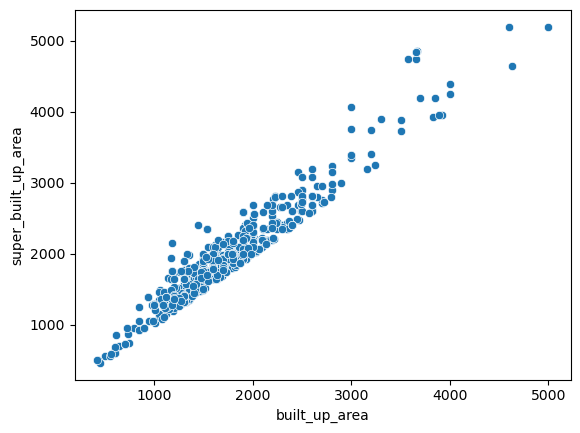

In [16]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

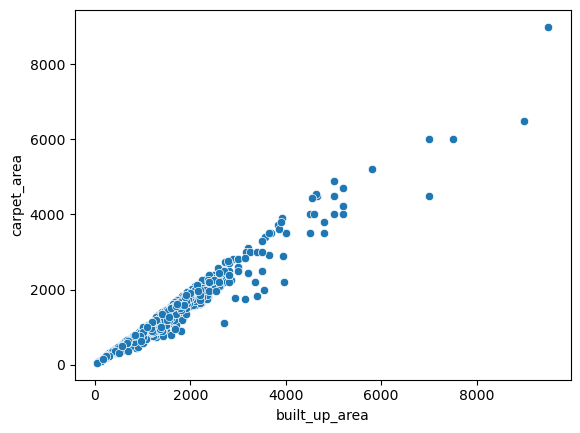

In [18]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [20]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3514    False
3515    False
3516    False
3517    False
3518    False
Length: 3519, dtype: bool

In [22]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [24]:
all_present_df.shape

(531, 24)

In [26]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [28]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [30]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [32]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [34]:
sbc_df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,sobha city,sector 108,3.95,16858.0,2343.101198,Super Built up area 2343(217.67 sq.m.)Carpet a...,3.0,5.0,2,15.0,North,New Property,2343.0,NaN,1512.05,0.0,1.0,0.0,0.0,0.0,1.0,118.0,781.033733
15,flat,bestech park view ananda,sector 81,1.35,7541.0,1790.213500,Super Built up area 1790(166.3 sq.m.)Carpet ar...,3.0,3.0,3+,10.0,North-East,Moderately Old,1790.0,NaN,1130.00,0.0,0.0,1.0,0.0,0.0,2.0,72.0,596.737833
18,flat,shapoorji pallonji joyville gurugram,sector 102,1.20,14563.0,824.006043,Super Built up area 1359(126.26 sq.m.)Carpet a...,2.0,2.0,3,0.0,North-East,Relatively New,1359.0,NaN,824.00,0.0,0.0,0.0,0.0,0.0,1.0,49.0,412.003021
26,flat,dlf regal gardens,sector 90,1.20,6837.0,1755.155770,Super Built up area 1755(163.04 sq.m.)Carpet a...,3.0,3.0,3+,15.0,South-West,Relatively New,1755.0,NaN,1400.00,0.0,0.0,0.0,0.0,0.0,1.0,118.0,585.051923
29,flat,eldeco accolade,sohna road,1.14,6530.0,1745.788668,Super Built up area 1751(162.67 sq.m.)Carpet a...,3.0,3.0,3+,4.0,East,Relatively New,1751.0,NaN,1062.00,0.0,0.0,0.0,0.0,0.0,1.0,157.0,581.929556


In [36]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_14164\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_14164\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [38]:
df.update(sbc_df)

In [40]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sq_ft           0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  999
agePossession             0
super_built_up_area    1644
built_up_area          1544
carpet_area            1686
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [42]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [44]:
sb_df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
17,flat,antriksh heights,sector 84,0.85,5556.0,1529.877610,Super Built up area 1350(125.42 sq.m.),2.0,2.0,3,10.0,North-West,New Property,1350.0,NaN,NaN,1.0,0.0,0.0,0.0,1.0,1.0,24.0,764.938805
21,flat,tata primanti,sector 72,3.40,15560.0,2185.089974,Super Built up area 2185(202.99 sq.m.),3.0,4.0,3+,9.0,NaN,Moderately Old,2185.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,38.0,728.363325
24,flat,dlf carlton estate,sector 43,2.10,15418.0,1362.044364,Super Built up area 1362(126.53 sq.m.),3.0,3.0,1,2.0,East,Old Property,1362.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,2.0,88.0,454.014788
33,flat,capital residences 360,sector 70a,1.10,7586.0,1450.039547,Super Built up area 1450(134.71 sq.m.),2.0,2.0,3+,8.0,NaN,New Property,1450.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,60.0,725.019773
37,flat,raheja navodaya,sector 92,0.85,5407.0,1572.036249,Super Built up area 1572(146.04 sq.m.),3.0,3.0,0,0.0,East,Relatively New,1572.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,88.0,524.012083


In [46]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_14164\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_14164\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fill

In [48]:
df.update(sb_df)

In [50]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sq_ft           0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  999
agePossession             0
super_built_up_area    1644
built_up_area           669
carpet_area            1686
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [52]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [54]:
c_df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,flat,paras dews,sector 106,1.35,8940.0,1510.067114,Carpet area: 1510 (140.28 sq.m.),4.0,3.0,3,19.0,NaN,Old Property,NaN,NaN,1510.0,0.0,1.0,0.0,0.0,0.0,1.0,112.0,377.516779
6,flat,signature global solera 2,sector 107,0.50,8928.0,560.035842,Carpet area: 560 (52.03 sq.m.),2.0,2.0,2,13.0,NaN,New Property,NaN,NaN,560.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,280.017921
12,flat,emaar mgf emerald floors premier,sector 65,2.00,12121.0,1650.028876,Carpet area: 1650 (153.29 sq.m.),3.0,3.0,3,1.0,North-West,Relatively New,NaN,NaN,1650.0,0.0,1.0,0.0,0.0,0.0,2.0,124.0,550.009625
13,flat,central park flower valley,sector 33,1.35,10384.0,1300.077042,Carpet area: 1300 (120.77 sq.m.),3.0,2.0,2,3.0,West,New Property,NaN,NaN,1300.0,0.0,0.0,0.0,0.0,0.0,1.0,87.0,433.359014
14,flat,sbr minda sec 1 imt manesar,manesar,0.65,4259.0,1526.179854,Carpet area: 1526 (141.77 sq.m.),3.0,2.0,3+,6.0,South,Moderately Old,NaN,NaN,1526.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,508.726618


In [56]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_14164\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_14164\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df

In [58]:
df.update(c_df)

In [60]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sq_ft           0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  999
agePossession             0
super_built_up_area    1644
built_up_area             0
carpet_area            1686
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

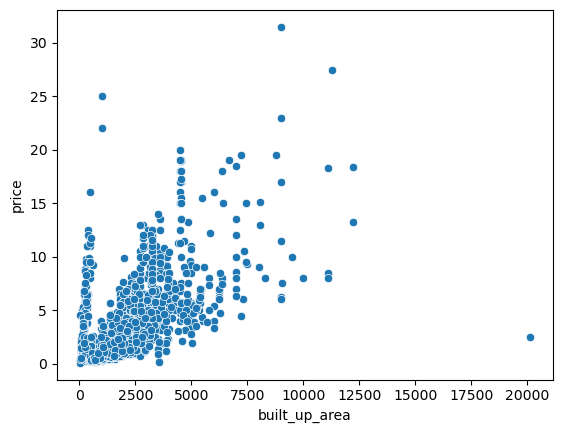

In [62]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [64]:

anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [66]:
anamoly_df.sample(5)

,price,area,built_up_area
2667,12.00,3240.000000,400.0
2652,3.20,1800.078753,1995.0
2809,4.85,1875.048326,1697.0
1403,3.50,1440.000000,178.0
175,2.51,2093.062041,1894.0


In [68]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [70]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

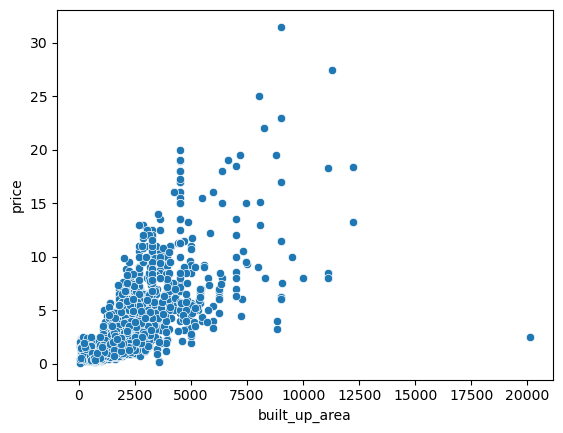

In [72]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [74]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [76]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sobha city,sector 108,3.95,16858.0,3.0,5.0,2,15.0,North,New Property,2343.101198,0.0,1.0,0.0,0.0,0.0,1.0,118.0
1,house,unitech uniworld resorts,sector 33,11.50,24573.0,5.0,6.0,3+,4.0,East,Relatively New,4680.000000,0.0,1.0,0.0,0.0,0.0,1.0,84.0
2,house,independent,sector 13,4.50,9091.0,4.0,5.0,2,2.0,East,Old Property,4950.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,flat,paras dews,sector 106,1.35,8940.0,4.0,3.0,3,19.0,NaN,Old Property,1678.000000,0.0,1.0,0.0,0.0,0.0,1.0,112.0
4,flat,corona optus,sector 37c,1.22,6912.0,3.0,4.0,3,5.0,South-East,Relatively New,1665.000000,0.0,0.0,0.0,0.0,0.0,1.0,149.0


In [78]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sq_ft      0
bedRoom              0
bathroom             0
balcony              0
floorNum            17
facing             999
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

# **floorNum**

In [81]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sq_ft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
174,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,0.0,1.0,0.0,0.0,0.0,1.0,59.0
361,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
393,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1758.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
496,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,1.0,88.0
821,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
965,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1237,flat,NaN,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1270,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
1540,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0
1702,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [83]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [85]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_14164\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [87]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sq_ft      0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
facing             999
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

In [89]:
1011/df.shape[0]

0.2872975277067349

# **facing**

<Axes: ylabel='count'>

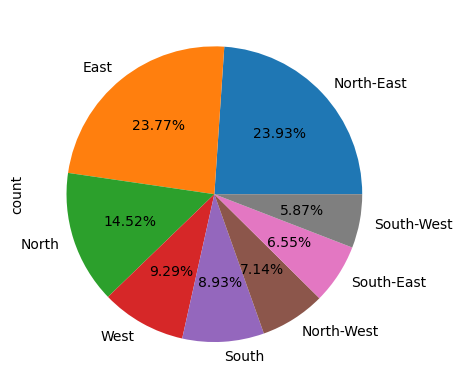

In [92]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [94]:
df.drop(columns=['facing'],inplace=True)

In [96]:
df.sample(5)

,property_type,society,sector,price,price_per_sq_ft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1673,flat,m3m woodshire,sector 107,1.21,6227.0,3.0,3.0,3,7.0,Moderately Old,1713.0,0.0,0.0,0.0,0.0,0.0,2.0,126.0
877,flat,bestech altura,sector 79,2.69,12500.0,3.0,4.0,3+,3.0,New Property,2152.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0
1110,flat,imperia the esfera,sector 37c,0.99,5454.0,3.0,4.0,3,9.0,Relatively New,1660.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0
2502,house,international city by sobha phase 2,sector 109,12.50,26670.0,5.0,6.0,3,3.0,Relatively New,4500.0,1.0,1.0,1.0,1.0,0.0,1.0,63.0
1722,flat,bestech park view residency,sector 2,1.59,8281.0,3.0,4.0,3+,11.0,Moderately Old,1738.0,0.0,1.0,0.0,0.0,0.0,1.0,100.0


In [98]:

df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sq_ft    0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [100]:
df.drop(index=[2536],inplace=True)

In [102]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sq_ft    0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# **agePossession**

In [105]:
df['agePossession'].value_counts()

agePossession
Relatively New        1599
New Property           557
Moderately Old         537
Old Property           283
Undefined              279
Under Construction     263
Name: count, dtype: int64

In [107]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sq_ft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
7,flat,chintamani,sector 103,1.57,8509.0,3.0,3.0,3,1.0,Undefined,1845.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11,house,bhim garh kheri,sector 3,1.50,7576.0,7.0,2.0,0,1.0,Undefined,1980.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28,flat,m3m golf hills phase 1,sector 79,1.70,10828.0,3.0,2.0,3,10.0,Undefined,1570.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53,flat,m3m one key resiments,sector 67,0.80,13115.0,1.0,1.0,0,0.0,Undefined,610.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68,flat,ramsons kshitij,sector 95,0.30,3158.0,2.0,2.0,1,11.0,Undefined,950.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3452,house,independent,sector 36,0.75,6938.0,3.0,1.0,0,1.0,Undefined,1081.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3457,flat,godrej nature plus,sector 33,1.25,9025.0,2.0,2.0,3,17.0,Undefined,1385.0,0.0,0.0,0.0,0.0,0.0,1.0,56.0
3467,flat,signature global infinity mall,sector 36,0.41,6269.0,2.0,2.0,3,3.0,Undefined,654.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3477,flat,spaze privy,sector 72,1.90,9620.0,3.0,3.0,3,10.0,Undefined,1975.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [109]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [111]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [113]:
df['agePossession'].value_counts()

agePossession
Relatively New        1709
New Property           598
Moderately Old         571
Old Property           310
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [115]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [117]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [119]:
df['agePossession'].value_counts()

agePossession
Relatively New        1722
New Property           599
Moderately Old         578
Old Property           320
Under Construction     277
Undefined               22
Name: count, dtype: int64

In [121]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [123]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [125]:
df['agePossession'].value_counts()

agePossession
Relatively New        1724
New Property           599
Moderately Old         598
Old Property           320
Under Construction     277
Name: count, dtype: int64

In [127]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sq_ft    0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [133]:
df.to_csv('../processed_data/gurgaon_properties_missing_value_imputation.csv',index=False)

In [131]:
df.shape

(3518, 18)